In [15]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [16]:
class Testbed():
    """
        Testbed class that define number of arms, Action values vector, and the optimal action
    """
    def __init__(self, nArms):
        self.nArms = nArms  # Number of arms
        self.Qt = np.zeros(self.nArms)  # initial average rewards of each action
        self.optimalAction = 0  # initial optimal action
        self.reset()  # Reset testbed
    def reset(self):
        """
            Reset Qt and optimalAction
        """
        self.Qt = np.random.normal(0, 1, self.nArms)  # gaussian distrubution between 0 and 1
        bestAction = np.where(self.Qt == max(self.Qt))[0]  # all optimal actions
        if len(bestAction) == 1:  # 1 optimal action
            self.optimalAction = np.argmax(self.Qt)
        else:  # more than 1 optimal actions
            self.optimalAction = np.random.choice(bestAction)  # randomly pick 1

class Bandit():
    """
        Bandit class that represent the k-armed Bandit model
    """
    def __init__(self,nArms, epsilon):
        self.nArms = nArms  # numbers of arms
        self.epsilon = epsilon  # value of epsilon

        self.Na = np.zeros(nArms)   # count number of actions taken for each arm
        self.Qa = np.zeros(nArms)   # estimated action values
    def __str__(self):
        """
            String used in plotting graph
        """
        if self.epsilon == 0:
            return "Epsilon = %s (Greedy)"%(str(self.epsilon))
        return "Epsilon = " + str(self.epsilon)
    def getActions(self):
        """
            Find the action based on the epsilon value
            input:
                none
            output:
                action (int)
        """
        # epsilon method
        if np.random.random()  < self.epsilon:
            return np.random.randint(self.nArms)  # randomly pick 1 action
        # greedy method
        else:
            action = np.where(self.Qa == max(self.Qa))[0]  # all possible actions with max Qa value
        
            if len(action) == 1:  # 1 possible action
                return np.argmax(self.Qa)
            else:  # more than 1 actions
                return np.random.choice(action)  # randomly pick 1 
    def getUpdate(self, reward,action):
        """
            Update value vector based on reward
            input:
                reward: float 
                action: number of the selected action (int)
            output:
                none
        """
        self.Na[action] += 1  # increase the action vector at the desired index by 1
        # update rule: Qa+1=Qa+alpha*[reward-Qa]
        alpha=1/self.Na[action]
        self.Qa[action] += alpha*(reward - self.Qa[action])
    def reset(self):
        """
            Reset Na and Qa to zero vector
        """
        self.Na = np.zeros(self.nArms)
        self.Qa = np.zeros(self.nArms) 

class Env():
    """
        Set up testbed, bandit models, running parameters, and run the bandit model
    """
    def __init__(self, testbed, bandits, runs, iterations):
        self.testbed = testbed 
        self.bandits = bandits
        self.runs = runs  # numbers of plays
        self.iterations = iterations  # numbers of iterations 
    def getReward(self,action):
        """
            Choose reward from normal(Qt of the selected action, 1)
            input:
                action: number of the selected action (int)
            output:
                reward (float)
        """
        return np.random.normal(self.testbed.Qt[action], 1)
    def run(self):
        """
            Run all bandit model to get average rewards and the optimal action matrix
            input:
                none
            output:
                average rewards matrix: matrix (numbers of plays x numbers of bandit models)
                optimal action matrix: matrix (numbers of plays x numbers of bandit models)
        """
        # matrix to record the result (column = each bandit model with different epsilon)
        optimlArr = np.zeros((self.runs, len(self.bandits)))  # optimal action matrix
        avgReward = np.zeros((self.runs,len(self.bandits)))  # average rewards matrix
        for i in range(self.iterations):
            self.testbed.reset()  # initialize testbed
            for bandit in self.bandits:
                bandit.reset()  # initialize bandit
            for play in range(self.runs):
                count = 0  # to count the numbers of bandit models
                for bandit in self.bandits:
                    tempAction = bandit.getActions()  # action value
                    temp_Reward = self.getReward(tempAction)  # reward
                    bandit.getUpdate(temp_Reward,tempAction)  # update parameters in the bandit model
                    avgReward[play,count] += temp_Reward  # add reward to the average rewards matrix
                    if tempAction == self.testbed.optimalAction:  # if that action is the optimal one
                        optimlArr[play,count] += 1  # increase the score of the optimal action matrix by 1 in the correct index
                    count += 1  # update the numbers of bandit models
        # average the matrix
        avgReward/=self.iterations
        optimlArr/=self.iterations
        # optimal action matrix * 100 to become percentage
        return avgReward, optimlArr*100

def getPlot(avg,opt,bandits):
    """
        Plot average rewards and optimal action matrix for each bandit model
        input:
            avg: average rewards matrix (numbers of plays x numbers of bandit models)
            opt: optimal action matrix (numbers of plays x numbers of bandit models)
            bandits: list of bandit models
        output:
            none
    """
    # average rewards plot
    plot1 = plt.figure(1)
    plt.title("10-armed bandit - average rewards")
    plt.ylabel('Average reward')
    plt.xlabel('Steps')
    plt.plot(avg)
    plt.ylim(0, 1.5)  # y limits
    plt.legend(bandits, loc=8)

    # optimal action plot
    plot2 = plt.figure(2)
    plt.title("10-armed bandit - optimal action")
    plt.ylabel('% Optimal action')
    plt.xlabel('Steps')
    plt.plot(opt)
    plt.ylim(0, 100)  # y limit
    plt.legend(bandits, loc=8)
    plt.show()

def main():
    """
        The main program to run the whole process
    """
    #Parameters set up
    eps=[0,0.01,0.1, 0.2,0.4,0.6,0.8,1]  # epsilon
    nArms = 10  # numbers of arms    
    iterations = 2000  # numbers of iterations
    runs = 1000  # numbers of plays
    testbed = Testbed(nArms)  # testbed
    bandits = [Bandit(nArms,eps[i]) for i in range(len(eps))]  # list of bandit models

    # run the model
    environment = Env(testbed,bandits,runs,iterations)
    avg_reward, opt_action = environment.run()

    # plot graphs 
    getPlot(avg_reward,opt_action,bandits)

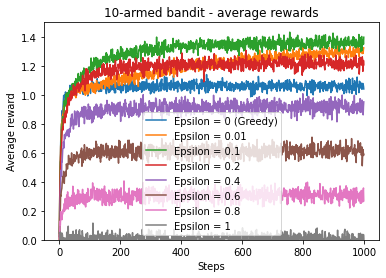

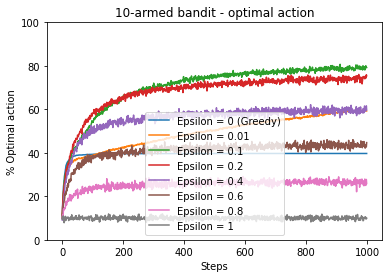

Run time:  232.72588579999865 Sec


In [17]:
start = timeit.default_timer()
main()
stop = timeit.default_timer()
print('Run time: ', stop - start, 'Sec')  